In [48]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers = ['TTE', 'AI.PA', 'AMZN', 'MC.PA', 'GOOG', 'PG', 'HPQ']

dataset = yf.download(tickers, start="2010-02-01", end="2024-01-01", period="1d")['Adj Close']
dataset = dataset.ffill()
dataset

[*********************100%%**********************]  7 of 7 completed


Ticker,AI.PA,AMZN,GOOG,HPQ,MC.PA,PG,TTE
Date,,,,,,,
2010-02-01,32.519367,5.943500,13.260649,14.715036,60.416256,40.760979,25.013439
2010-02-02,33.008205,5.906000,13.213381,14.948850,61.764225,41.359333,25.221239
2010-02-03,32.705791,5.955000,13.454700,14.991925,62.030807,41.194946,24.966784
2010-02-04,32.022263,5.797000,13.105409,14.468921,59.372887,40.373020,24.131310
2010-02-05,31.417442,5.869500,13.217609,14.558131,57.019592,40.307262,23.465475
...,...,...,...,...,...,...,...
2023-12-22,174.580658,153.419998,142.557770,29.682791,730.756287,143.442017,65.992630
2023-12-26,174.580658,153.410004,142.657669,29.909002,730.756287,144.093689,66.464973
2023-12-27,174.049133,153.339996,141.279236,29.741804,728.477966,144.212158,66.667404


AI.PA 8.22 %
AMZN 32.52 %
GOOG 7.66 %
HPQ 0.0 %
MC.PA 29.32 %
PG 22.28 %
TTE 0.0 %
Portfolio Sharpe Ratio:  0.9779826971295039


<Axes: xlabel='Date'>

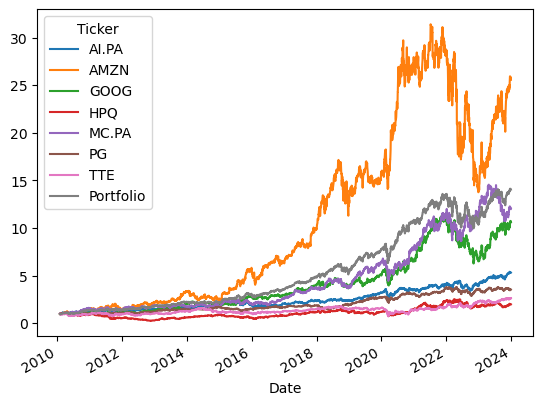

In [49]:
from scipy.optimize import minimize


trading_days = 252
yearly_risk_free_rate = 1.02
daily_risk_free_rate = np.exp(np.log(yearly_risk_free_rate) / trading_days) - 1
df = dataset.pct_change(1).dropna()

def portfolio_sharpe_ratio(weights):
    mean_excess_returns = np.dot(df.values, weights)
    ptf_excess_returns = mean_excess_returns - risk_free_rate
    return  np.sqrt(trading_days) * np.mean(ptf_excess_returns) / np.std(ptf_excess_returns)

def objective_function(weights):
    return 1/portfolio_sharpe_ratio(weights)

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(len(tickers)))
init_guess = [1. / len(tickers)] * len(tickers)

optimized_result = minimize(objective_function, init_guess,
                            args=(),
                            method='SLSQP', bounds=bounds, constraints=constraints)

optimized_weights = optimized_result.x

# Display optimized weights

for i in range(len(tickers)):
    print(df.columns.tolist()[i], round(100 * optimized_weights[i], 2), '%')

print("Portfolio Sharpe Ratio: ", portfolio_sharpe_ratio(optimized_weights))

df['Portfolio'] = np.dot(df.values, optimized_weights)
(df+1).cumprod().plot()